Base 2 Log of Degree:  0
In-sample error rate: 0.0207
Out-of-sample error rate: 0.0243
Base 2 Log of Degree:  1
In-sample error rate: 0.0043
Out-of-sample error rate: 0.0066
Base 2 Log of Degree:  2
In-sample error rate: 0.0005
Out-of-sample error rate: 0.0052
Base 2 Log of Degree:  3
In-sample error rate: 0.0000
Out-of-sample error rate: 0.0068
Base 2 Log of Degree:  4
In-sample error rate: 0.0000
Out-of-sample error rate: 0.0097
Base 2 Log of Degree:  5
In-sample error rate: 0.0000
Out-of-sample error rate: 0.0185


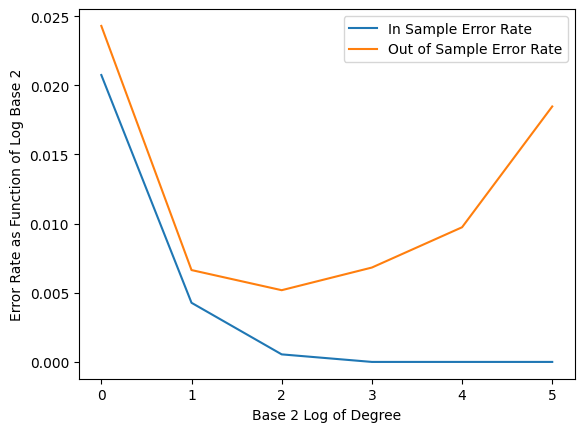

In [36]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt


D = fetch_openml("pendigits", version=1, as_frame=False)
X = D.data
y = D.target

inSampleErrorRates = []
outOfSampleErrorRates = []
degrees = []

for p in range(0, 6):
  k = 2 ** p
  print("Base 2 Log of Degree: ", p)
  clf = SVC(kernel="poly", degree = k)
  clf.fit(X, y)
  degrees.append(p)
  inSampleErrorRate = 1 - clf.score(X, y)
  print(f"In-sample error rate: {inSampleErrorRate:.4f}")
  inSampleErrorRates.append(inSampleErrorRate)
  outOfSampleErrorRate = 1 - np.mean(cross_val_score(clf, X, y, cv=10))
  print(f"Out-of-sample error rate: {outOfSampleErrorRate:.4f}")
  outOfSampleErrorRates.append(outOfSampleErrorRate)

plt.plot(degrees, inSampleErrorRates, label="In Sample Error Rate")
plt.plot(degrees, outOfSampleErrorRates, label="Out of Sample Error Rate")
plt.legend()
plt.xlabel('Base 2 Log of Degree')
plt.ylabel('Error Rate as Function of Log Base 2')
plt.show()

mean reward -88.47
mean reward -80.22
mean reward -36.01
mean reward 0.0
mean reward 43.99
mean reward -1.41
mean reward 0.0
mean reward -0.59
mean reward 0.0
mean reward 0.0
mean reward 0.0
mean reward -7.44
mean reward -0.27
mean reward -0.69
mean reward -0.04
mean reward 0.95
mean reward 0.81
mean reward 0.0
mean reward 0.0
mean reward 0.0
mean reward -0.1
mean reward -0.05
mean reward -0.05
mean reward -0.03
mean reward -0.03
mean reward -0.05
mean reward 0.0
mean reward -0.07
mean reward -0.15
mean reward 0.96
mean reward 0.0
mean reward 0.96
mean reward -1.11
mean reward -0.08
mean reward 0.43
mean reward 0.0
mean reward 1.22
mean reward 0.47
mean reward 0.0
mean reward -0.05
mean reward -1.07
mean reward -0.03
mean reward 0.0
mean reward 0.09
mean reward 0.68
mean reward 0.31
mean reward -0.74
mean reward -0.07
mean reward -0.08
mean reward 0.0
mean reward 0.92
mean reward -0.04
mean reward -0.09
mean reward -0.13
mean reward -0.05
mean reward 0.37
mean reward 0.93
mean reward 1

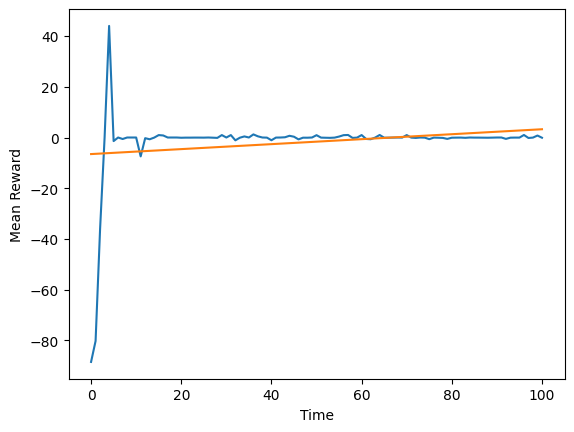

(array([[ 1.03731200e+01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 3.27232412e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 8.88778575e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 5.37832606e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-6.00000000e-01,  1.89778826e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 4.20000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 4.20000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    

In [20]:
# Q-learning for the hill-climbing example from my MDP/RL notes
# SAA, Oct. 2025

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LinReg

# State space is a finite square grid with integer coordinates
w = 6
S = list(product(np.arange(-w, w+1), repeat=2))
S = [np.array([x,y]) for (x,y) in S]

# Time horizon (number of actions per episode)
T = 22*w//10

# Discount factor
gamma = 0.95

# Contiguous-translation criterion
def near(loc):
    return np.linalg.norm(loc, ord=1) <= 1

# Actions are represented by the (intended) translation vectors
A = [np.array([x,y]) for x in range(-1,2) for y in range(-1,2) if near([x,y])]

# Returns smallest index of val in array list
def iof(val, arrlst):
    return [i for i in range(len(arrlst)) if np.all(arrlst[i]==val)][0]

# Landscape is described by an elevation function
def r(loc):
    x, y = loc[0], loc[1]
    return 50 - (x-5)**2 - (y+3)**2

# Rewards are elevation differences between future and present locations
def R(iact, isp, isf):
    return r(S[isf]) - r(S[isp])

# Total reward along a state trajectory
def Rtotal(iacts, istates):
    return np.sum([gamma**t * R(iacts[t],istates[t],istates[t+1])\
                   for t in range(T)])

# Transitions obey intended actions with probability 0.9;
# the rest of the time, actual actions are sampled unif rand from rest of A
M = np.zeros((len(A), len(S), len(S)))
for a in range(len(A)):
    for ilocp in range(len(S)):
        for ilocf in range(len(S)):
            if np.all(S[ilocp] + A[a] == S[ilocf]):
                M[a, ilocp, ilocf] = 0.9
            elif near(S[ilocf]-S[ilocp]):
                M[a, ilocp, ilocf] = (1-0.9)/(len(A)-1)
# Normalization is needed because some states have smaller neighborhoods
M /= np.sum(M, axis=2).reshape((M.shape[0],M.shape[1],1))

# Returns index of randomly sampled state ~ P(. | S[isp], A[ia])
def sampleNext(isp, ia):
    cdf = np.cumsum(M[ia, isp, :])
    r = np.random.random()
    return np.min([i for i in range(len(S)) if cdf[i] >= r])

# Returns sample state paths for given policy and start, as index array
def sampleTrajectories(pi, is0):
    isp = np.empty((T+1, len(is0)), dtype=int)
    isp[0,:] = is0
    for t in range(T):
        for p in range(len(is0)):
            isp[t+1,p] = sampleNext(isp[t,p], pi[isp[t,p]])
    return isp

# eps-greedy action selection
# returns uniformly random choice of action index with probability eps
# returns Qstar-optimal index for current state s otherwise
def epsGreedyActionIndex(sIndex, Qstar, eps):
    val = np.random.rand()
    if val < eps:
      return np.random.choice(range(len(A))) #Randomly choose an action index in A
    else:
      return np.argmax(Qstar[sIndex, :]) #Otherwise, pick the action index that gets us most reward

# Q-learning main function
def qlearn(alpha=0.2, eps=0.05, Ttrain=10**4, Tplot=100):
    Qstar = np.zeros((len(S),len(A)))
    piStar = np.zeros((len(S),), dtype=int)
    is0 = np.random.choice(range(len(S)))
    paths = sampleTrajectories(piStar, [is0])
    meanR = [np.mean([Rtotal(paths[:,0],paths[:,p])\
                      for p in range(paths.shape[1])])]
    print('mean reward', round(meanR[-1],2))
    for t in range(Ttrain):
        ia0 = epsGreedyActionIndex(is0, Qstar, eps)
        is1 = sampleNext(is0, ia0)
        #UPDATE Qstar AND piStar BELOW
        Qstar[is0,ia0] = (1 - alpha)*Qstar[is0, ia0] + alpha*(R(ia0, is0, is1) + gamma*Qstar[is1, piStar[is1]]) #This is what is included in our Q-learning notes
        piStar[is0] = np.argmax(Qstar[is0, :]) #piStar is array with best action at each step, so update the best action index as one giving best reward

        paths = sampleTrajectories(piStar, [is0])
        if t%Tplot==0:
            meanR.append(np.mean([Rtotal(paths[:,0],paths[:,p])\
                                  for p in range(paths.shape[1])]))
            print('mean reward', round(meanR[-1],2))
        is0 = is1
    plt.plot(meanR)
    steps = np.array(range(len(meanR))).reshape(-1,1)

    plt.plot(LinReg().fit(steps, meanR).predict(steps))
    plt.xlabel('Time')
    plt.ylabel('Mean Reward')
    plt.show()
    return Qstar, piStar

qlearn()

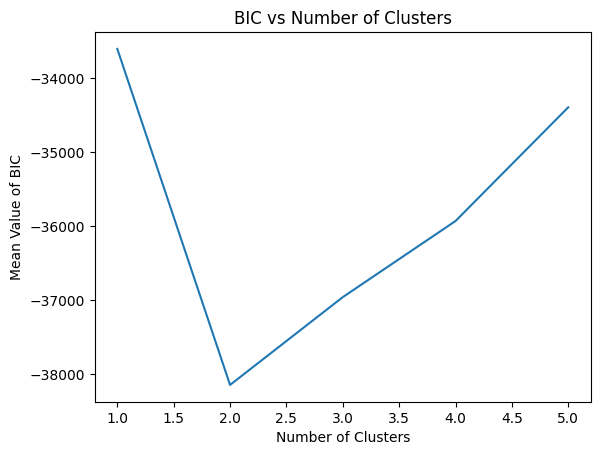

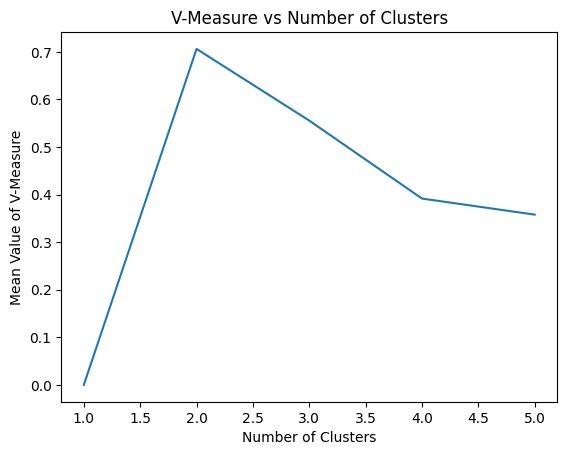

In [40]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import v_measure_score
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt

D = fetch_openml("wdbc")
X = D.data
y = D.target

kValues = [1, 2, 3, 4, 5]
BICValues = {k: [] for k in kValues}
VValues = {k: [] for k in kValues}

for i in range(100):
  for k in kValues:
    gmm = GaussianMixture(n_components=k, random_state=i)
    gmm.fit(X)
    labels = gmm.predict(X)
    BICValues[k].append(gmm.bic(X))
    VValues[k].append(v_measure_score(y, labels))

mean_BIC = [np.mean(BICValues[k]) for k in kValues]
mean_V = [np.mean(VValues[k]) for k in kValues]

plt.plot(kValues, mean_BIC, label="BIC")
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Value of BIC')
plt.title('BIC vs Number of Clusters')
plt.show()

plt.plot(kValues, mean_V, label="V-Measure")
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Value of V-Measure')
plt.title('V-Measure vs Number of Clusters')
plt.show()